In [1]:
!pip install tensorflow==1.14

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import json
import pickle
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
model = load_model("/content/drive/My Drive/Colab Notebooks/Data Science/My Work/Image Captioning-Flask/model_weights/model_9.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [4]:
model_temp = ResNet50(weights='imagenet', input_shape=(224,224,3))

In [0]:
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)

In [0]:
def preprocess_image(img):
  img = image.load_img(img, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)
  return img

In [0]:
def encode_image(img):
  img = preprocess_image(img)
  feature_vector = model_resnet.predict(img)
  feature_vector = feature_vector.reshape(1, feature_vector.shape[1],)
  return feature_vector

In [0]:
import pickle

In [0]:
with open("/content/drive/My Drive/Colab Notebooks/Data Science/My Work/Image Captioning-Flask/Output_Files/word_to_idx.pkl",'rb') as w2i:
  word_to_idx = pickle.load(w2i)

with open("/content/drive/My Drive/Colab Notebooks/Data Science/My Work/Image Captioning-Flask/Output_Files/idx_to_word.pkl",'rb') as i2w:
  idx_to_word = pickle.load(i2w)

In [0]:
def predict_caption(photo):
    
    max_len = 35
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([photo,sequence])
        ypred = ypred.argmax() #Word with max prob always - Greedy Sampling
        word = idx_to_word[ypred]
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [0]:
from IPython.display import Image

In [0]:
enc = encode_image("1.jpeg")

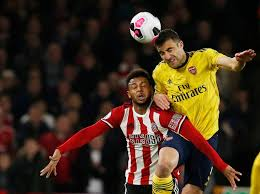

In [13]:
Image('1.jpeg')


In [14]:
print(predict_caption(enc))

two men in red and white are playing football


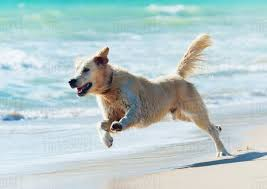

In [15]:
Image('2.jpeg')

In [16]:
enc = encode_image("2.jpeg")
print(predict_caption(enc))

dog running in the snow


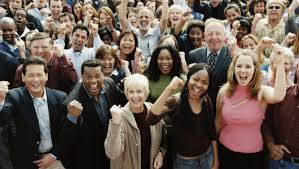

In [17]:
Image('3.jpeg')

In [18]:
enc = encode_image("3.jpeg")
print(predict_caption(enc))

crowd of people are standing in crowd of people
